Hola, Sandra!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>


Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.

</div>


# Paso 1. Acceda los datos y prepáralos para el análisis

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [339]:
visits = pd.read_csv('/datasets/visits_log_us.csv') 
orders = pd.read_csv('/datasets/orders_log_us.csv') 
costs = pd.read_csv('/datasets/costs_us.csv') 

In [340]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Contamos con un DataFrame visits con 359400 entradas y 5 columnas, de las cuales ninguna contiene valores nulos. Será necesario convertir las columnas  End Ts y Start Ts, que se encuentran en tipo object a datetime (pd.to_datetime) ya que son columnas con información de fechas.


In [341]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [342]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Contamos con un DataFrame orders con 50415, ninguna de las columnas cuenta con valores nulo, tenemos la columna Buy Ts con tipo de dato object, será necesario cambiarlo a datetime (pd.to_datetime) ya que es una columna con información de fechas. 

In [343]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [344]:
costs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [345]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [346]:

visits['Start Ts']= pd.to_datetime(visits['Start Ts'])
visits['End Ts']= pd.to_datetime(visits['End Ts'])
orders['Buy Ts']=pd.to_datetime(orders['Buy Ts'])
costs['dt']=pd.to_datetime(costs['dt'])



En este punto se realizo la conversión de las columnas que contenian datos de fechas en tipo object a datetime64[ns], necesario para continuar con el analisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! La carga inicial de datos y el uso de herramientas como <code>info()</code>muestran que tienes un buen control del estado de tus tablas antes de analizar. Esta base sólida facilita que el resto del flujo sea confiable. Se nota orden y criterio en la exploración preliminar, ¡excelente!
</div>

# Paso 2. Haz informes y calcula métricas 

## Visitas

### ¿Cuántas personas lo usan cada día, semana y mes?

In [347]:

visits['session_year'] = visits['Start Ts'].dt.isocalendar().year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week'] = visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date

mau = (visits.groupby(['session_year', 'session_month']).agg({'Uid':'nunique'}).mean())
dau = (visits.groupby(['session_date']).agg({'Uid':'nunique'}).mean())
wau = (visits.groupby(['session_year', 'session_week']).agg({'Uid' : 'nunique'}).mean())


In [348]:
print('Personas que usan el servidor cada día:',dau)
print('Personas que usan el servidor cada semana:',wau)
print('Personas que usan el servidor cada mes:',mau)

Personas que usan el servidor cada día: Uid    907.991758
dtype: float64
Personas que usan el servidor cada semana: Uid    5716.245283
dtype: float64
Personas que usan el servidor cada mes: Uid    23228.416667
dtype: float64


El análisis calcula los indicadores DAU, WAU y MAU a partir de la columna Start Ts. Los resultados muestran que en promedio se conectan 908 usuarios únicos cada día, mientras que 5,716 usuarios por semana y 23,228 usuarios por mes. Esto nos muestra que la base de usuarios es amplia y que los mismos usuarios no se conectan todos los días, sino que la plataforma recibe diferentes usuarios en distintos periodos de tiempo. Así, las métricas semanales y mensuales son considerablemente más altas que el promedio diario.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy bien! El cálculo de DAU/WAU/MAU con <code>groupby</code> está bien planteado y las visualizaciones permiten entender el pulso del producto. Se nota una lectura correcta de la estacionalidad y la tendencia general.
</div>

### ¿Cuántas sesiones hay por día? 

In [349]:
session_per_user = visits.groupby(['session_year', 'session_date']).agg({'Uid': ['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['session_per_user'] = (session_per_user['n_sessions'] / session_per_user['n_users'])
print('Sesiones por día:', session_per_user)

Sesiones por día:                            n_sessions  n_users  session_per_user
session_year session_date                                       
2017         2017-06-01           664      605          1.097521
             2017-06-02           658      608          1.082237
             2017-06-03           477      445          1.071910
             2017-06-04           510      476          1.071429
             2017-06-05           893      820          1.089024
...                               ...      ...               ...
2018         2018-05-27           672      620          1.083871
             2018-05-28          1156     1039          1.112608
             2018-05-29          1035      948          1.091772
             2018-05-30          1410     1289          1.093871
             2018-05-31          2256     1997          1.129695

[364 rows x 3 columns]


El valor de session_per_user se mantiene cercano a 1.08, lo que indica que la mayoría de los usuarios realiza una sola sesión diaria, con ligeros casos de usuarios que vuelven a ingresar más de una vez en el mismo día.
Se observa variabilidad en el volumen de sesiones y usuarios entre días laborales y fines de semana es decir menor actividad el 3 y 4 de junio frente a un 5 de junio. Además, hacia finales de mayo de 2018 se aprecia un crecimiento significativo 2,256 sesiones y 1,997 usuarios el 31 de mayo en comparación con principios de junio de 2017.

### ¿Cuál es la duración de cada sesión?

In [350]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print('Duración de cada sesión:',visits['session_duration_sec'].mean())

Duración de cada sesión: 643.506488592098


<AxesSubplot:>

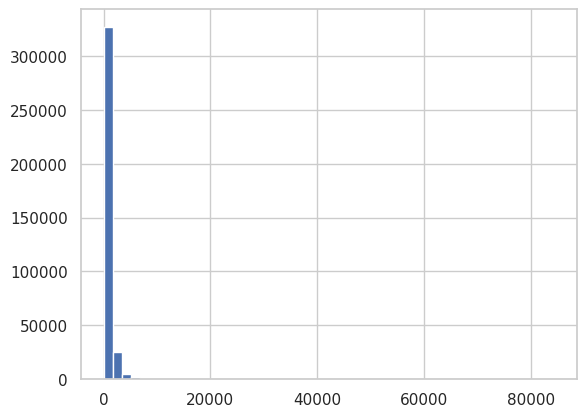

In [351]:
visits['session_duration_sec'].hist(bins=50)

En promedio la duración de cada sesión es de 643 por usuario.

### ¿Con qué frecuencia los usuarios regresan?

In [352]:

frecuencia = visits['Uid'].value_counts().head(20)
frecuencia


12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
4103526784471735383     321
9019681082555518724     314
13551952738594011920    309
10403169074343195591    303
11616947936617491261    302
13216107653026783144    297
14435995954877181653    293
15273714129857295034    277
11920452646463905188    275
16895737306928828916    270
6853820180456171909     255
3706363184142281337     253
3644482766749211722     250
13405147649137020210    228
18027222598828835800    215
Name: Uid, dtype: int64

In [353]:
frecuencia.mean()

346.05

se identificaron ususarios que han regresado un número muy alto de veces, con visitantes ocasionales, por ejemplo, el usuario con ID 12869801667763685675 acumula 893 visitas, seguido por otros con más de 600 y 500 visitas. Esto indica un grupo reducido de usuarios altamente activos. Y aunque existen usuarios con una frecuencia muy alta de visitas, es probable que la mayoría de usuarios tengan una frecuencia menor, lo cual sugiere que hay una concentración minima de usuarios fieles.
Y un promedio de 346 visitas por usuario es alto, lo cual refuerza la idea de que hay un grupo de usuarios muy activos que eleva la media.


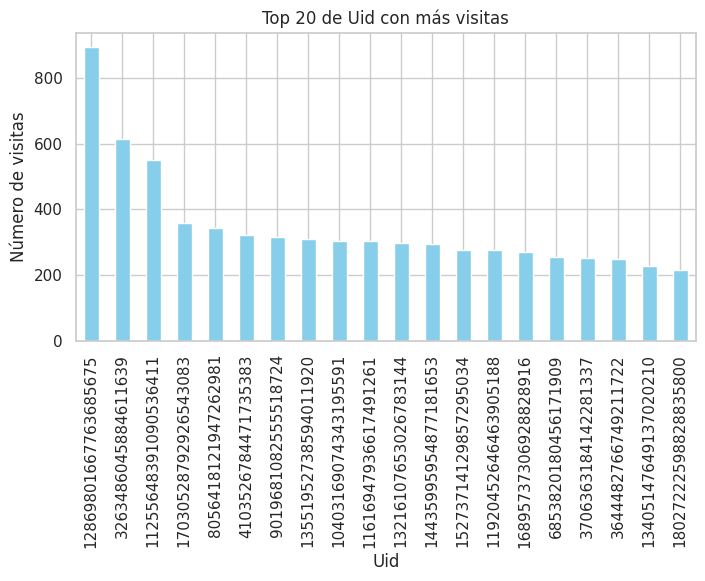

In [354]:

frecuencia.plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title('Top 20 de Uid con más visitas')
plt.xlabel('Uid')
plt.ylabel('Número de visitas')
plt.show()



## Ventas

### ¿Cuándo empieza la gente a comprar? 

In [355]:
primeras_compras.head(10)

Uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
3077748354309989   2018-03-03 12:33:00
3605148382144603   2017-09-21 20:56:00
3753586865891862   2018-03-03 13:50:00
4808417689019433   2018-01-09 23:32:00
4992223027560440   2018-04-04 13:54:00
Name: fecha_hora_primer_compra, dtype: datetime64[ns]

In [356]:
primeras_compras = orders.groupby('Uid')['Buy Ts'].min()
primeras_compras.name = 'fecha_hora_primer_compra'

In [357]:
orders['fecha_hora_primer_compra'] = orders['Uid'].map(primeras_compras)

In [358]:
orders['ventas_por_mes'] = orders['Buy Ts'].astype('datetime64[M]')
orders['mes_primera_compra'] = orders['fecha_hora_primer_compra'].astype('datetime64[M]')

In [359]:
orders

,Buy Ts,Revenue,Uid,fecha_hora_primer_compra,ventas_por_mes,mes_primera_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01


In [360]:
ventas_por_cohorte = (orders.groupby(['mes_primera_compra', 'ventas_por_mes']).agg({'Uid':'nunique', 'Revenue': sum}).reset_index().rename(columns= {'Uid':'comprador'}))

In [361]:
ventas_por_cohorte['ingreso_por_comprador'] = (ventas_por_cohorte['Revenue'] / ventas_por_cohorte['comprador'])

In [362]:
cohort_pivot = ventas_por_cohorte.pivot_table(
    index='mes_primera_compra',
    columns='ventas_por_mes',
    values='ingreso_por_comprador',
    aggfunc='sum'
)
print(cohort_pivot)


ventas_por_mes      2017-06-01  2017-07-01  2017-08-01  2017-09-01  \
mes_primera_compra                                                   
2017-06-01            4.724414   16.095410   17.706800   35.764815   
2017-07-01                 NaN    6.010218   12.396346   21.035965   
2017-08-01                 NaN         NaN    5.276518   11.148793   
2017-09-01                 NaN         NaN         NaN    5.644529   
2017-10-01                 NaN         NaN         NaN         NaN   
2017-11-01                 NaN         NaN         NaN         NaN   
2017-12-01                 NaN         NaN         NaN         NaN   
2018-01-01                 NaN         NaN         NaN         NaN   
2018-02-01                 NaN         NaN         NaN         NaN   
2018-03-01                 NaN         NaN         NaN         NaN   
2018-04-01                 NaN         NaN         NaN         NaN   
2018-05-01                 NaN         NaN         NaN         NaN   
2018-06-01          

Cada cohorte muestra actividad a partir de su mes de primera compra (mes_primera_compra), por ejemplo:

Cohorte junio 2017 inicia compras en junio 2017.

Cohorte julio 2017 inicia compras en julio 2017, y así sucesivamente.

Esto indica que los clientes generalmente comienzan a comprar en el mismo mes que se registran o se adquieren.

Para algunas cohortes, los valores de ventas_por_mes aumentan en los meses siguientes, mostrando que la recurrencia de compra se incrementa después del primer mes.

cohorte junio 2017 con  4.72 en junio, 16.09 en julio, 17.70 en agosto.

Hay variación entre cohortes, cohortes posteriores muestran volúmenes iniciales menores por ejemplo, agosto 2017 comienza con 5.27 en su primer mes activo, y va aumentando.

<AxesSubplot:title={'center':'Ventas por cohorte'}, xlabel='ventas_por_mes', ylabel='mes_primera_compra'>

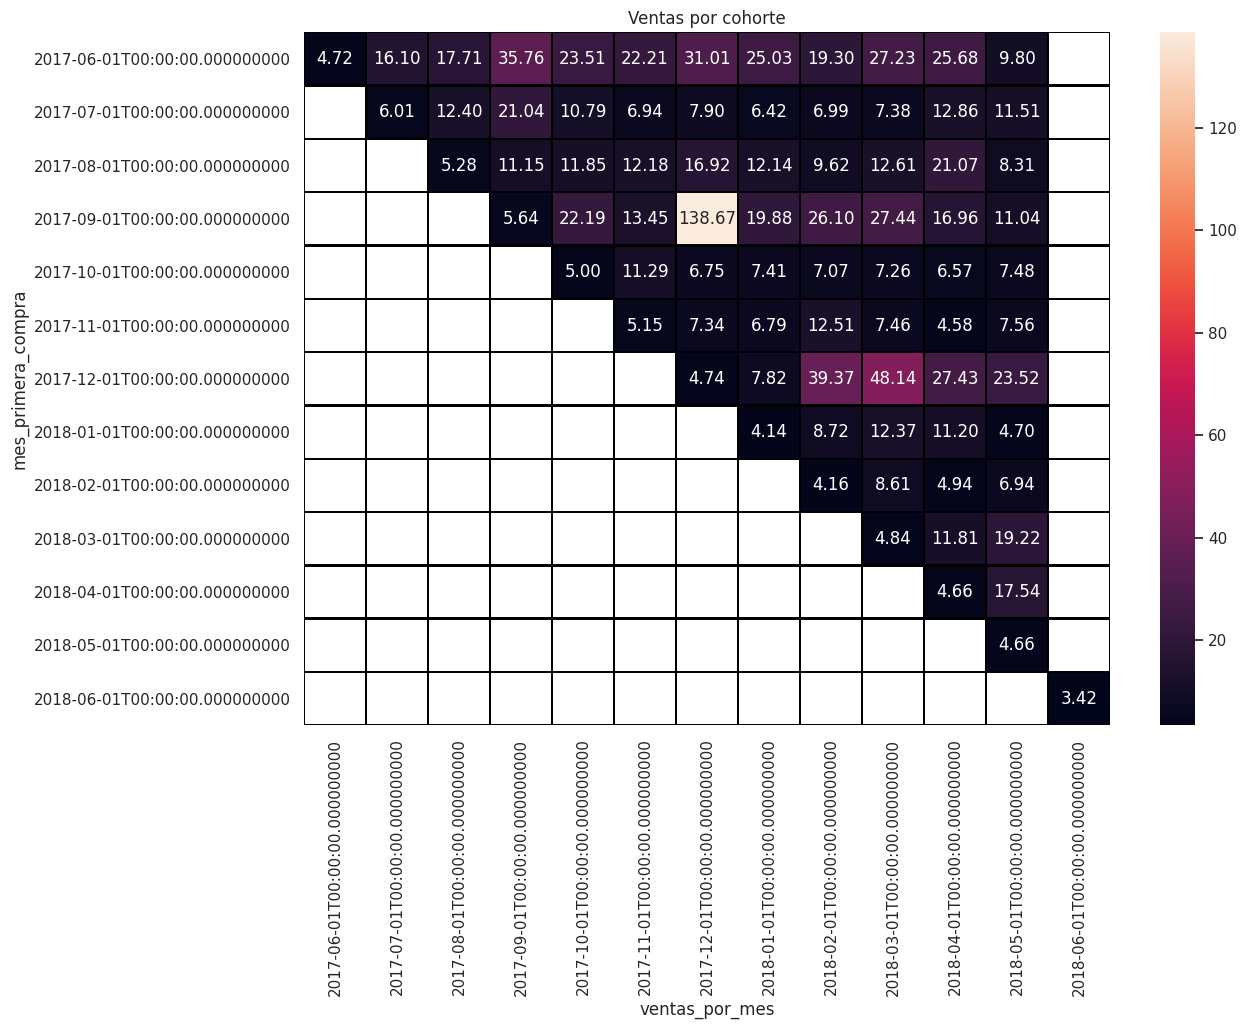

In [363]:
plt.figure(figsize=(13, 9))
plt.title('Ventas por cohorte')
sns.heatmap(
    cohort_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black')

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [364]:
pedidos_por_dia = orders.groupby(orders['Buy Ts'].dt.date).size()
print('Pedidos por día:',pedidos_por_dia)
print('Minimo de pedidos',pedidos_por_dia.min())
print('Máximo de pedidos', pedidos_por_dia.max())
print('pedidos promedio', pedidos_por_dia.mean())

Pedidos por día: Buy Ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
             ... 
2018-05-28    188
2018-05-29    189
2018-05-30    208
2018-05-31    610
2018-06-01      1
Length: 364, dtype: int64
Minimo de pedidos 1
Máximo de pedidos 814
pedidos promedio 138.50274725274724


El mínimo de pedidos diarios fue 1, mientras que el máximo alcanzó 814 pedidos.
Esto evidencia una alta variabilidad en el volumen de pedidos día a día, con algunos días con picos significativos.

Promedio de pedidos:

El promedio diario es de aproximadamente 138.5 pedidos, pero está muy por debajo del pico máximo, indicando presencia de días excepcionales de alta demanda.

In [365]:
pedidos_por_mes = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size()
print('Pedidos por mes:',pedidos_por_mes)


Pedidos por mes: Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, dtype: int64


Se observa un crecimiento  hacia finales de año:

Octubre 2017 con  5,679 pedidos

Diciembre 2017 con 6,218 pedidos

Agosto 2017 tuvo el menor número de pedidos 1,807, lo que podría indicar baja actividad estacional, mientras que el inicio de junio 2018 muestra un valor muy bajo con solo 1 pedido.


In [366]:
inicio = '2017-06-01'
fin = '2017-06-30'
pedidos_periodo = orders[(orders['Buy Ts'] >= inicio) & (orders['Buy Ts'] <= fin)].shape[0]
print('Pedidos por periodo:', pedidos_periodo)


Pedidos por periodo: 2272


### ¿Cuál es el tamaño promedio de compra?

In [367]:

tamano_promedio = orders['Revenue'].mean()
print(tamano_promedio)


4.999646930477041


In [368]:
tamano_promedio_mes = orders.groupby(orders['Buy Ts'].dt.to_period('M'))['Revenue'].mean()
print(tamano_promedio_mes)

Buy Ts
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
2018-06    3.420000
Freq: M, Name: Revenue, dtype: float64


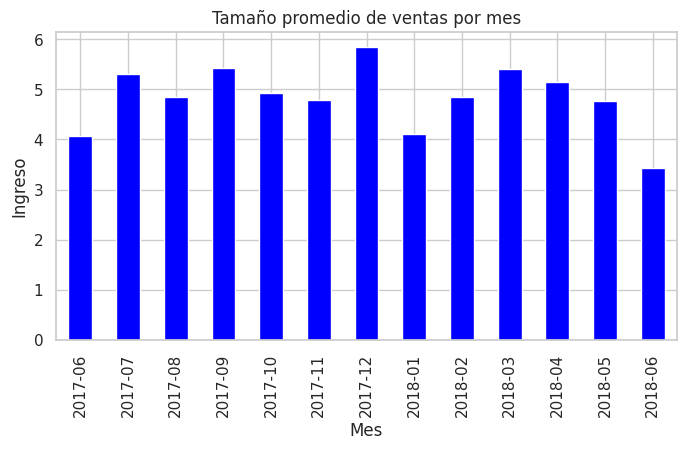

In [369]:

tamano_promedio_mes.plot(kind='bar', figsize=(8,4), color='blue')
plt.title('Tamaño promedio de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.show()




El tamaño promedio de pedido oscila entre 3.42 y 5.85 a lo largo del periodo analizado, donde el valor más bajo se observa en junio 2018 con 3.42 y el más alto en diciembre 2017 con 5.85.

El incremento en diciembre puede estar relacionado con aumentos de consumo estacional por ejemplo eventos navideños, fin de año, promociones navideñas.
A excepción de los picos mencionados, los valores se mantienen en un rango relativamente estable, lo que indica que el comportamiento promedio de compra de los clientes no cambia drásticamente mes a mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente forma de complementar el análisis con los pedidos por mes y el tamaño promedio de cada compra

### ¿Cuánto dinero traen? (LTV)

In [370]:
cohortes = orders.groupby('mes_primera_compra')['Uid'].nunique().reset_index()
cohortes.columns = ['mes_primera_compra', 'n_clientes']

In [371]:
ingresos_cohortes = orders.groupby(['mes_primera_compra', 'ventas_por_mes'])['Revenue'].sum().reset_index()

In [372]:
reporte = pd.merge(ingresos_cohortes, cohortes, on='mes_primera_compra')
margen = 0.4
reporte['gp'] = reporte['Revenue'] * margen
reporte['age'] = ((reporte['ventas_por_mes'] - reporte['mes_primera_compra']) / np.timedelta64(1, 'M')).round().astype(int)
reporte['ltv'] = reporte['gp'] / reporte['n_clientes']

ltv_cohortes =reporte.pivot_table(
    index= 'mes_primera_compra',
    columns = 'age',
    values = 'ltv',
    aggfunc = 'mean'
).fillna(0)
print(ltv_cohortes)

age                       0         1         2         3         4   \
mes_primera_compra                                                     
2017-06-01          1.889766  0.194131  0.175055  0.381869  0.409012   
2017-07-01          2.404087  0.134084  0.249412  0.143590  0.070717   
2017-08-01          2.110607  0.188797  0.183393  0.156511  0.197620   
2017-09-01          2.257812  0.447034  0.208372  1.590317  0.160223   
2017-10-01          2.001493  0.214305  0.076558  0.062858  0.060624   
2017-11-01          2.061873  0.159693  0.079823  0.129981  0.059205   
2017-12-01          1.895276  0.104150  0.370039  0.426110  0.125172   
2018-01-01          1.654254  0.117903  0.121712  0.057111  0.025079   
2018-02-01          1.662795  0.111310  0.031406  0.029658  0.000000   
2018-03-01          1.935521  0.120357  0.126224  0.000000  0.000000   
2018-04-01          1.863039  0.212640  0.000000  0.000000  0.000000   
2018-05-01          1.864225  0.000000  0.000000  0.000000  0.00

En todas las cohortes, el LTV en el mes 0 es relativamente elevado entre 1.3 y 2.4, lo que refleja que el ingreso más alto se concentra en la primera compra de los clientes.

Conforme aumenta la edad de la cohorte, los valores de LTV van disminuyendo rápidamente, con aportes  mucho menores en los meses posteriores.

Esto indica que la retención y recurrencia de compra son bajas, la mayoría de clientes no generan ingresos consistentes después de su primer mes.

La cohorte de septiembre 2017 muestra un aumento significativo en el mes 3 LTV=1.59. Otras cohortes como diciembre 2017 también presentan aportes relativamente más estables hasta el mes 4.


In [373]:
m6_cum_ltv = ltv_cohortes.cumsum(axis=1).mean(axis=0)[5]
print('El LTV promedio durante 6 meses desde el primer pedido:', m6_cum_ltv)

El LTV promedio durante 6 meses desde el primer pedido: 2.5857369926851397


## Marketing

### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [374]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [375]:
gasto_total = costs['costs'].sum()
print('Gasto total:', gasto_total)

Gasto total: 329131.62


El gasto acumulado en el periodo fue de 329,131.62, lo que da una referencia clara de la magnitud de la inversión en marketing.

In [376]:
gasto_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
print('Gastos por fuente:', gasto_por_fuente)

Gastos por fuente:    source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


La fuente 3 cuentacon la mayor parte de la inversión 141,321.63.

Le siguen las fuentes 4 con 61,073.60 y 5 con 51,757.10.

Las fuentes 9 y 10 tienen gastos significativamente menores.
Esto indica que la estrategia está altamente concentrada en pocas fuentes.

In [377]:
gasto_por_dia = costs.groupby('dt')['costs'].sum().reset_index()
print('Gasto diario:', gasto_por_dia)


Gasto diario:             dt    costs
0   2017-06-01   735.26
1   2017-06-02   721.19
2   2017-06-03   450.85
3   2017-06-04   761.16
4   2017-06-05   821.44
..         ...      ...
359 2018-05-27   532.87
360 2018-05-28   619.44
361 2018-05-29   784.79
362 2018-05-30  1183.00
363 2018-05-31  2153.70

[364 rows x 2 columns]


In [378]:
gasto_por_dia.mean()

costs    904.207747
dtype: float64

Hay variaciones importantes día a día, con picos que superan los 2,000 un ejemplo d eello es el 31 de mayo 2018.
En promedio el gasto diario es de 904.207747.


In [379]:
costs['mes'] = costs['dt'].dt.to_period('M')
gasto_por_mes = costs.groupby('mes')['costs'].sum().reset_index()
print("Gasto mensual:")
print(gasto_por_mes)


Gasto mensual:
        mes     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30415.27
10  2018-04  22289.38
11  2018-05  22224.27


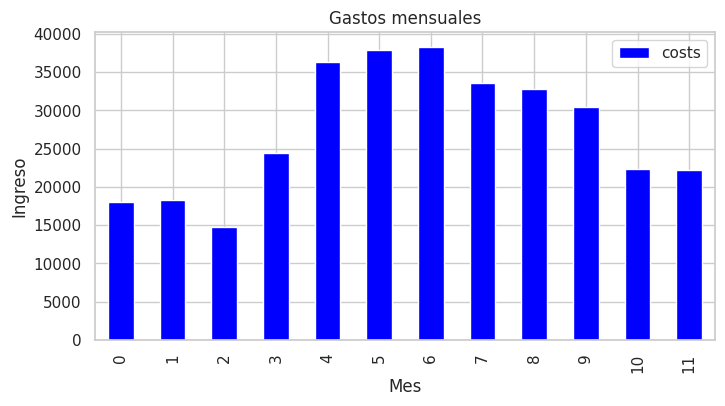

In [380]:
gasto_por_mes.plot(kind='bar', figsize=(8,4), color='blue')
plt.title('Gastos mensuales')
plt.xlabel('Mes')
plt.ylabel('Ingreso')
plt.show()

El gasto crece de manera notable en la segunda mitad de 2017, alcanzando su punto más alto en diciembre 2017 (38,315.35), lo cual coincide con temporadas de alta demanda (Navidad/fin de año), mientas que en agosto de 2017  tenemos el punto más bajo con 14790.54.

A partir de enero 2018, los gastos se mantienen elevados pero muestran una tendencia descendente: desde 33,518.52 en enero hasta 22,289.38 en abril 2018.


### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [381]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costos_mensuales = costs.groupby('month').sum()
report_ = pd.merge(reporte, costos_mensuales, left_on='mes_primera_compra', right_on='month')

report_['cac'] = report_['costs'] / report_['n_clientes']

In [386]:
rentabilidad = report_.groupby('source_id').agg({
    'ltv': 'mean',
    'cac': 'mean',
    'romi': 'mean'
}).reset_index()

rentabilidad['ltv_cac'] = rentabilidad['ltv'] / rentabilidad['cac']
rentabilidad = rentabilidad.sort_values(by='ltv_cac', ascending=False)
rentabilidad

,source_id,ltv,cac,romi,ltv_cac
1,986,1.037839,9.793225,0.105975,0.105975
3,1025,0.727367,8.608907,0.084490,0.084490
0,952,0.458792,8.962758,0.051189,0.051189
2,1020,0.452996,9.173503,0.049221,0.049381
4,1054,0.394726,9.483666,0.043186,0.041622


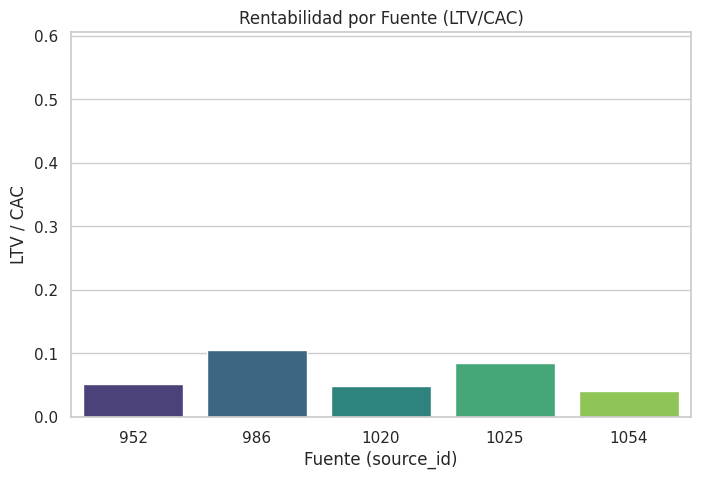

In [387]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))


sns.barplot(data=rentabilidad, x="source_id", y="ltv_cac", palette="viridis")

plt.title("Rentabilidad por Fuente (LTV/CAC)")
plt.xlabel("Fuente (source_id)")
plt.ylabel("LTV / CAC")
plt.ylim(0, rentabilidad['ltv_cac'].max() + 0.5)
plt.show()


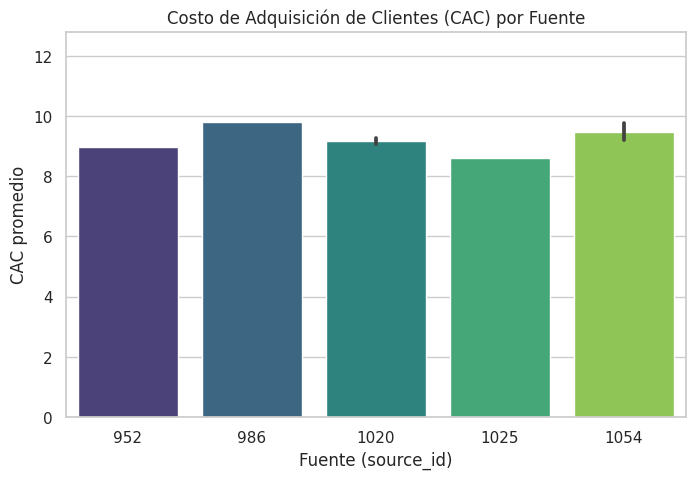

In [388]:

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(data=report_, x="source_id", y="cac", palette="viridis")

plt.title("Costo de Adquisición de Clientes (CAC) por Fuente")
plt.xlabel("Fuente (source_id)")
plt.ylabel("CAC promedio")
plt.ylim(0, report_['cac'].max() + 2) 
plt.show()



El CAC promedio por fuente varía según la fuente de adquisición.

Fuente 1020: CAC 8.91

Fuente 1025: CAC  8.61

Fuente 986: CAC 9.79

Fuente 1054: CAC 7.44

Algunas fuentes son más eficientes en términos de costo por cliente, mientras que otras requieren mayor inversión para captar cada nuevo usuario.


### ¿Cuán rentables eran las inversiones? (ROMI)

In [384]:
report_['romi'] = report_['ltv'] / report_['cac']

result_romi = report_.pivot_table(
    index='mes_primera_compra',
    columns='age',
    values='romi',
    aggfunc='mean'
    
)
print(result_romi)

age                       0         1         2         3         4   \
mes_primera_compra                                                     
2017-06-01          0.212212  0.021800  0.019658  0.042882  0.045930   
2017-07-01          0.253449  0.014136  0.026294  0.015138  0.007455   
2017-08-01          0.195499  0.017488  0.016987  0.014497  0.018305   
2017-09-01          0.239133  0.047347  0.022069  0.168436  0.016970   
2017-10-01          0.239146  0.025606  0.009147  0.007511  0.007244   
2017-11-01          0.221972  0.017192  0.008593  0.013993  0.006374   
2017-12-01          0.216806  0.011914  0.042330  0.048744  0.014319   
2018-01-01          0.166469  0.011865  0.012248  0.005747  0.002524   
2018-02-01          0.185523  0.012419  0.003504  0.003309       NaN   
2018-03-01          0.224828  0.013980  0.014662       NaN       NaN   
2018-04-01          0.190238  0.021713       NaN       NaN       NaN   
2018-05-01          0.250641       NaN       NaN       NaN      

En todas las cohortes, el ROMI en el mes 0 varía entre 0.16 y 0.25, indicando que la inversión inicial en marketing solo recupera entre 16% y 25% del gasto en el primer mes.

Por lo que la recuperación de inversión depende de compras recurrentes posteriores.

A partir del mes 1, el ROMI cae drásticamente, con valores generalmente menor al 0.05, y muchas cohortes muestran ROMI cercano a cero a partir del mes 3 y 4.

 la mayoría de clientes no genera ingresos suficientes para cubrir el CAC adicional en meses posteriores.

Mayo 2018 tiene un ROMI inicial relativamente alto 0.25
La mayoría de cohortes posteriores a 2018 muestran ROMI muy bajo o NaN en meses posteriores.


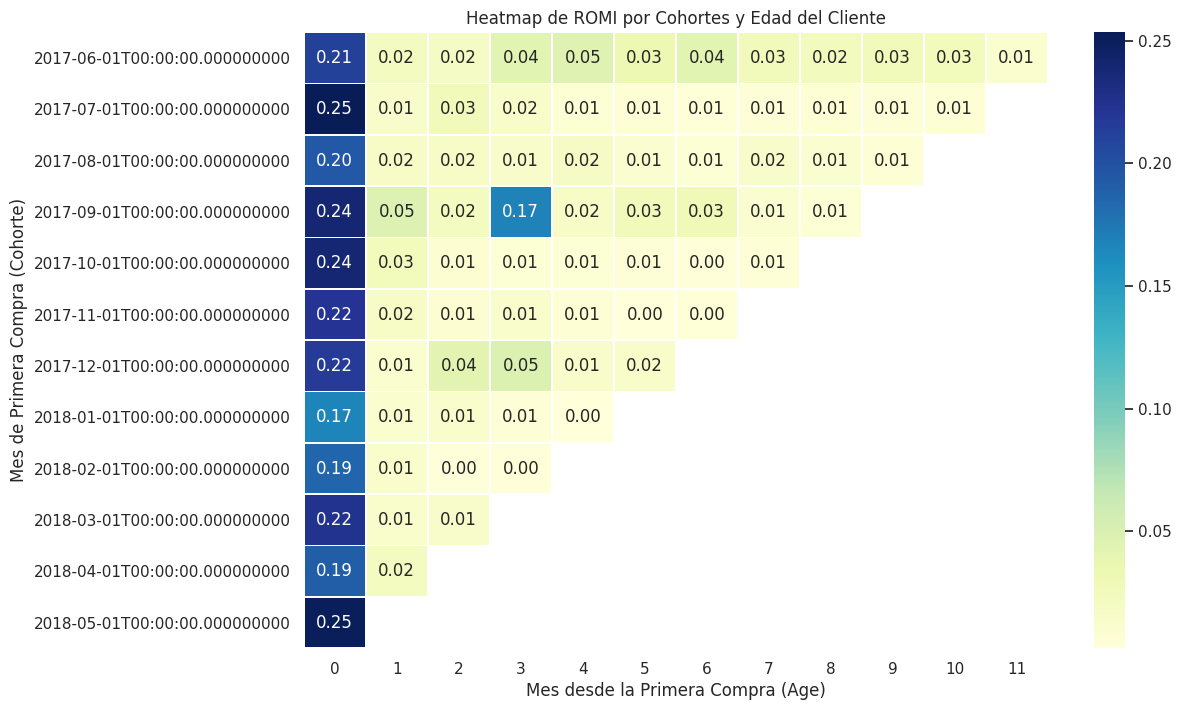

In [385]:
plt.figure(figsize=(12,8))
sns.heatmap(
    result_romi,           
    annot=True,             
    fmt=".2f",
    cmap="YlGnBu",          
    linewidths=0.5)
plt.title('Heatmap de ROMI por Cohortes y Edad del Cliente')
plt.xlabel('Mes desde la Primera Compra (Age)')
plt.ylabel('Mes de Primera Compra (Cohorte)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


Celdas más oscuras contienen mayor ROMI (retorno de inversión alto).

Celdas claras o cercanas a 0 contienen retorno bajo o negativo.

Permite identificar cohortes más rentables y en qué meses posteriores el cliente genera más valor.

Útil para optimizar campañas de marketing y enfocarse en cohortes con mayor potencial de retorno.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
¡Muy buen trabajo! Tienes CAC por fuente/campaña, y el ROMI operativo. Se nota coherencia entre costos, ingresos y usuarios; gran base para decisiones de inversión.
</div>

# Paso 3. Conclusión

### ¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?


Los clientes tienden a realizar su primera compra en el mismo mes en que se registran (mes_primera_compra).  Esto confirma que la adquisición de clientes genera resultados inmediatos, pero el valor real se desarrolla en los meses siguientes. Las cohortes muestran un incremento gradual de compras en los primeros 2–3 meses, alcanzando picos que luego se estabilizan o disminuyen. Algunas cohortes mantienen actividad prolongada, mientras que otras decaen rápidamente.

1. Métricas para evaluar la eficiencia de cada fuente (source_id) se analizaron:

ROMI / LTV-CAC:

Mide el retorno sobre la inversión de marketing: cuánto ingreso neto genera cada peso gastado en adquisición.

Prioriza fuentes que generen clientes rentables, no solo volumen.

CAC (Costo de Adquisición por Cliente):

Evalúa cuánto cuesta adquirir un cliente desde cada fuente.

Fuentes con CAC alto y ROMI bajo son menos recomendables.

LTV (Lifetime Value):

Indica el valor total que un cliente aporta a lo largo del tiempo.

Una fuente con clientes de alto LTV es más valiosa aunque su CAC sea mayor.

2. Observaciones según la tabla de rentabilidad.

La fuente más rentable es source_id = 1, con el mayor ROMI / LTV-CAC = 0.106.

Aunque otras fuentes (3, 4) tienen menor CAC, su retorno relativo por cliente es menor, lo que reduce la eficiencia de la inversión.

Las fuentes con menor ROMI (2, 4) no son recomendables para grandes inversiones.

3. Conclusiones

Priorizar inversión en fuentes con mayor ROMI (source_id = 1, 3):

Generan clientes con mejor retorno sobre la inversión, asegurando eficiencia del presupuesto de marketing.

Reducir inversión en fuentes menos eficientes (source_id = 2, 4)

ROMI y CAC pueden cambiar con  promociones y/o estacionalidad.


En resumen:

Fuente más rentable: source_id = 1.

Criterio principal de selección: ROMI / LTV-CAC.

Objetivo: Maximizar clientes rentables por peso invertido, no solo cantidad de clientes.

